In [1]:
import pandas as pd
import numpy as np

## Objective

For the purpose of this analysis, I will attempt to measure the sentiment of tweets to learn whether tweets impact the number of Covid-19 cases and deaths in the United States. This study is important as the reopening of our society, from going to get an ice cream cone to being able to earn a living, hinges on our ability to lower the rate of infection in our country. With so many individuals receiving their news and information through social media, being able to predict how COVID cases will either increase or decrease based on tweets can inform public policy. Should we be able to predict the future number of COVID cases based on the text of tweets; public officials, business leaders and concerned citizens can alter their tweeting practices to promote improved COVID outcomes.

To create the dataset, I utilized the TWINT library to collect all tweets from January 1,2020 until July 10th. I then made various subsets of the tweets. For example, to measure the impact of tweets by public leaders viewed as polar opposites regarding their response to the pandemic, I collected tweets by President Trump and the Governor of New York, Andrew Cuomo. Another subset of tweets that I labeled as baseline consists of tweets by the New York Times and Washington Post - two of America's leading journalism outlets.

The purpose of creating these subsets is that the baseline tweets can be considered to be those that communicate mainly fact. While they might have op-ed columnists, we can assume that most tweets from the news reporting divisions will provide factual updates on the Covid response. By considering the two polar opposites, Trump and Cuomo, we can measure Covid outcomes, in terms of cases, after the tweets have been consumed by the public. Finally, the main Covid collection will allow us to see whether more individuals subscribed to the Trump/Cuomo tweets and how Covid cases changed, for the positive or negative, in their region.

## Obtaining Data

For the notebooks that contain the queries for the tweets gathered on TWINT, please refer to the Covid Data Queries notebook in the repo. The JSON files for these queries were used to create DataFrames.

In [2]:
#All Covid tweets
All_Covid_tweets = pd.read_json('Covid_tweets3.json',lines=True)

#All Trump tweets
Trump_Covid_tweets = pd.read_json('Trump_Covid_tweets3.json', lines=True)

#All Cuomo tweets
Cuomo_Covid_tweets = pd.read_json('Cuomo_Covid_tweets3.json',lines=True)

#Baseline Tweets
NYTimes_tweets = pd.read_json('Nytimes_Covid_tweets3.json',lines=True)
#print( len(NYTimes_tweets))
WashingtonPost_tweets = pd.read_json('Washpost_tweets3.json',lines=True)
#print( len(Washpost_tweets3.json))

#combining NYTimes and Washington Post to get Baseline Tweets
Baseline_tweets = pd.concat([NYTimes_tweets,WashingtonPost_tweets],axis=0)

#Reformatting Date columns for later merge
All_Covid_tweets['Date'] = All_Covid_tweets['date']
Trump_Covid_tweets['Date'] = Trump_Covid_tweets['date']
Cuomo_Covid_tweets['Date'] = Cuomo_Covid_tweets['date']
Baseline_tweets['Date'] = Baseline_tweets['date']

Data for Covid Cases and Deaths was collected from The COVID Tracking Project.

In [3]:
# Covid data set

covid_cases = pd.read_csv('time_series_covid_19_confirmed.csv')

#Getting US data - confirmed cases
covid_cases = covid_cases[covid_cases['Country/Region'] == 'US']
#covid_cases = covid_cases.transpose()

# Covid death data set

covid_deaths = pd.read_csv('time_series_covid_19_deaths.csv')


#Getting US data - confirmed cases

#covid_deaths = covid_deaths.transpose()
covid_deaths = covid_deaths[covid_deaths['Country/Region'] == 'US']


In [4]:
#Covid cases and deaths (still need to rename columns, from left to right = cases then deaths)
covid_data = pd.concat([covid_cases,covid_deaths],axis=0)
covid_data = covid_data.transpose()

In [5]:
covid_data = covid_data.drop(['Province/State','Country/Region','Lat','Long'])

In [6]:
covid_data.head()

,225,225
1/22/20,1,0
1/23/20,1,0
1/24/20,2,0
1/25/20,2,0
1/26/20,5,0


### Adding Case/Death Data on Day of the Tweet

In [7]:
#Edited column names in Excel for Merge
covid_data_formatted = pd.read_excel('covid_data_date.xlsx')
covid_data_formatted.head()

,Date,Cases,Deaths
0,1/22/20,1,0
1,1/23/20,1,0
2,1/24/20,2,0
3,1/25/20,2,0
4,1/26/20,5,0


In [8]:
#Converting all Date columns to datetime for Merge
covid_data_formatted['Date'] = pd.to_datetime(covid_data_formatted['Date'])
All_Covid_tweets['Date'] = pd.to_datetime(All_Covid_tweets['Date'])
Trump_Covid_tweets['Date'] = pd.to_datetime(Trump_Covid_tweets['Date'])
Cuomo_Covid_tweets['Date'] = pd.to_datetime(Cuomo_Covid_tweets['Date'])
Baseline_tweets['Date'] = pd.to_datetime(Baseline_tweets['Date'])

In [9]:
#All Tweet Data with corresponding case/death information
All_Covid_tweets_case_data = pd.merge(All_Covid_tweets,covid_data_formatted,on='Date')
#Trump Tweet Data with corresponding case/death information
Trump_Covid_tweets_case_data = pd.merge(Trump_Covid_tweets,covid_data_formatted,on='Date')
#Cuomo Tweet Data with corresponding case/death information
Cuomo_Covid_tweets_case_data = pd.merge(Cuomo_Covid_tweets,covid_data_formatted, on='Date')
#Baseline Tweet Data with corresponding case/death information
Baseline_tweets_case_data = pd.merge(Baseline_tweets,covid_data_formatted,on='Date')

### Adding case/death data for two weeks after original tweet

In [10]:
#Getting date two weeks from now for Covid case/death reaction to Tweets
from datetime import datetime,timedelta

N = 14
days_N_from_now = All_Covid_tweets['Date'] + timedelta(days=N)

All_Covid_tweets_case_data['14 days'] = (All_Covid_tweets_case_data['Date'] + timedelta(days=N))
Trump_Covid_tweets_case_data['14 days'] = (Trump_Covid_tweets_case_data['Date'] + timedelta(days=N))
Cuomo_Covid_tweets_case_data['14 days'] = (Cuomo_Covid_tweets_case_data['Date'] +timedelta(days=N))
Baseline_tweets_case_data['14 days'] = (Baseline_tweets_case_data['Date'] + timedelta(days=N))

In [11]:
covid_data_two_week = pd.read_excel('covid_data_14days.xlsx')
covid_data_two_week.head()

,14 days,Cases,Deaths
0,1/22/20,1,0
1,1/23/20,1,0
2,1/24/20,2,0
3,1/25/20,2,0
4,1/26/20,5,0


In [12]:
#Converting all Date columns to datetime for Merge
covid_data_two_week['14 days'] = pd.to_datetime(covid_data_two_week['14 days'])
All_Covid_tweets_case_data['14 days'] = pd.to_datetime(All_Covid_tweets_case_data['14 days'])
Trump_Covid_tweets_case_data['14 days'] = pd.to_datetime(Trump_Covid_tweets_case_data['14 days'])
Cuomo_Covid_tweets_case_data['14 days'] = pd.to_datetime(Cuomo_Covid_tweets_case_data['14 days'])
Baseline_tweets_case_data['14 days'] = pd.to_datetime(Baseline_tweets_case_data['14 days'])

In [13]:
#All Tweet Data with corresponding case/death information
All_Covid_tweets_case_data = pd.merge(All_Covid_tweets_case_data,covid_data_two_week,on='14 days')
#Trump Tweet Data with corresponding case/death information
Trump_Covid_tweets_case_data = pd.merge(Trump_Covid_tweets_case_data,covid_data_two_week,on='14 days')
#Cuomo Tweet Data with corresponding case/death information
Cuomo_Covid_tweets_case_data = pd.merge(Cuomo_Covid_tweets_case_data,covid_data_two_week, on='14 days')
#Baseline Tweet Data with corresponding case/death information
Baseline_tweets_case_data = pd.merge(Baseline_tweets_case_data,covid_data_two_week,on='14 days')

### Adding Case/Death Data for four weeks after original tweet

In [14]:
covid_data_four_week = pd.read_excel('covid_data_28days.xlsx')
covid_data_four_week.head()

,28 days,Cases,Deaths
0,1/22/20,1,0
1,1/23/20,1,0
2,1/24/20,2,0
3,1/25/20,2,0
4,1/26/20,5,0


### Getting Dates and COVID Data for two weeks after Tweet

In [15]:
#Getting date two weeks from now for Covid case/death reaction to Tweets
from datetime import datetime,timedelta

N = 28
days_N_from_now = All_Covid_tweets['Date'] + timedelta(days=N)

All_Covid_tweets_case_data['28 days'] = (All_Covid_tweets_case_data['Date'] + timedelta(days=N))
Trump_Covid_tweets_case_data['28 days'] = (Trump_Covid_tweets_case_data['Date'] + timedelta(days=N))
Cuomo_Covid_tweets_case_data['28 days'] = (Cuomo_Covid_tweets_case_data['Date'] +timedelta(days=N))
Baseline_tweets_case_data['28 days'] = (Baseline_tweets_case_data['Date'] + timedelta(days=N))

In [16]:
#Converting all Date columns to datetime for Merge
covid_data_four_week['28 days'] = pd.to_datetime(covid_data_four_week['28 days'])
All_Covid_tweets_case_data['28 days'] = pd.to_datetime(All_Covid_tweets_case_data['28 days'])
Trump_Covid_tweets_case_data['28 days'] = pd.to_datetime(Trump_Covid_tweets_case_data['28 days'])
Cuomo_Covid_tweets_case_data['28 days'] = pd.to_datetime(Cuomo_Covid_tweets_case_data['28 days'])
Baseline_tweets_case_data['28 days'] = pd.to_datetime(Baseline_tweets_case_data['28 days'])

In [17]:
#All Tweet Data with corresponding case/death information
All_Covid_tweets_case_data = pd.merge(All_Covid_tweets_case_data,covid_data_four_week,on='28 days')
#Trump Tweet Data with corresponding case/death information
Trump_Covid_tweets_case_data = pd.merge(Trump_Covid_tweets_case_data,covid_data_four_week,on='28 days')
#Cuomo Tweet Data with corresponding case/death information
Cuomo_Covid_tweets_case_data = pd.merge(Cuomo_Covid_tweets_case_data,covid_data_four_week, on='28 days')
#Baseline Tweet Data with corresponding case/death information
Baseline_tweets_case_data = pd.merge(Baseline_tweets_case_data,covid_data_four_week,on='28 days')

In [18]:
Baseline_tweets_case_data.head()

,cashtags,conversation_id,created_at,date,geo,hashtags,id,likes_count,link,mentions,...,video,Date,Cases_x,Deaths_x,14 days,Cases_y,Deaths_y,28 days,Cases,Deaths
0,[],1270707306578264064,2020-06-10 13:20:05,2020-06-10,,[],1270707306578264065,209,https://twitter.com/nytimes/status/12707073065...,[],...,0,2020-06-10,2000702,113631,2020-06-24,2382426,122604,2020-07-08,3054699,132300
1,[],1270636833555308544,2020-06-10 08:40:03,2020-06-10,,[],1270636833555308544,857,https://twitter.com/nytimes/status/12706368335...,[],...,0,2020-06-10,2000702,113631,2020-06-24,2382426,122604,2020-07-08,3054699,132300
2,[],1270815442173603840,2020-06-10 20:29:46,2020-06-10,,[],1270815442173603841,159,https://twitter.com/washingtonpost/status/1270...,[],...,0,2020-06-10,2000702,113631,2020-06-24,2382426,122604,2020-07-08,3054699,132300
3,[],1270541216308957184,2020-06-10 02:20:06,2020-06-09,,[],1270541216308957184,382,https://twitter.com/nytimes/status/12705412163...,[nytmag],...,0,2020-06-09,1979908,112714,2020-06-23,2347491,121847,2020-07-07,2996098,131480
4,[],1270470755889840128,2020-06-09 21:40:07,2020-06-09,,[],1270470755889840134,404,https://twitter.com/nytimes/status/12704707558...,[nytmag],...,0,2020-06-09,1979908,112714,2020-06-23,2347491,121847,2020-07-07,2996098,131480


### Combined Tweet DataFrame

In [19]:
#Tweet dataframes combined

Master_Tweet_df = pd.concat([All_Covid_tweets_case_data,Trump_Covid_tweets_case_data,Cuomo_Covid_tweets_case_data,Baseline_tweets_case_data])

### Organizing US State Data from NYTimes

The NYTimes manages a github repo that tracks state by state COVID Data. This data can be useful later in the analysis when we track how certain localities have fared dealing with the COVID pandemic. Tracking state COVID details will allow for examination of whether states that are classified as subscribing to the tenets of the Trump administrtion respond better/worse than states that might align more with the politics of NY governor Andrew Cuomo.

In [20]:
#reading in data from CSV
state_case_df = pd.read_csv('us-states.csv')

#Groupby to get states by state
state_case_df.groupby('state')

state_case_df = state_case_df.sort_values(['state','date'],ascending=[True,True])
#state_case_df = state_case_df.sort_values('date',ascending=True)
state_case_df.reset_index(drop=True,inplace=True)
#state_case_df = state_case_df.sort_values('date',ascending=True)
#state_case_df.head(50)

### SCRUBBING OF TWEETS

In [48]:
#Tweet scrubbing I used for Mod 4 project
import re
from string import punctuation
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
tweets = Master_Tweet_df['tweet']
corpus = []
twitter_list = ['mention','rt','link','sxsw','quot','downtown','austin']
stopword_list = stopwords.words('english')
stopword_list = stopword_list + twitter_list
for tweet in tweets:
    tweet = re.sub('[^a-zA-Z]', ' ', tweet)
    tweet = tweet.join([c for c in tweet if c not in punctuation])
    tweet = tweet.lower()
    tweet = tweet.split()
    ps = PorterStemmer()
    tweet = [word for word in tweet if not word in stopword_list]
    tweet = ' '.join(tweet)
    corpus.append(tweet)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/jamaalsmith/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [49]:
#additional scrubbing with assistance of preprocessor library
from gensim.parsing.preprocessing import remove_stopwords
from gensim.parsing.preprocessing import preprocess_documents
import preprocessor as p
p.set_options(p.OPT.URL, p.OPT.EMOJI, p.OPT.RESERVED, p.OPT.SMILEY, p.OPT.MENTION, p.OPT.HASHTAG, p.OPT.NUMBER)

#Using preprocessor library to scrub tweets
tweets = corpus

clean_tweets = []
for tweet in tweets:
  clean = p.clean(tweet)
  clean_tweets.append(clean)

Master_Tweet_df['clean_tweets'] = clean_tweets

#tweets = Master_Tweet_df['clean_tweets']

#clean_tweets_stopwords_punc_lowercase = []

#for tweet in tweets:
 #   clean = remove_stopwords(tweet)
 #   clean_tweets_stopwords_punc_lowercase.append(clean)

#Master_Tweet_df['clean_tweets'] = clean_tweets_stopwords_punc_lowercase
    
#Removing white spaces, punctuation and apply lowercasing
#Master_Tweet_df['clean_tweets'] = Master_Tweet_df['clean_tweets'].str.lower().str.replace('[^\w\s]',' ').str.replace('\s\s+', ' ')
#tweets = Master_Tweet_df['clean_tweets']

In [ ]:
tweets


In [24]:
#Removing stopwords and punctuation

#Tweet Tokenizer 
from nltk.tokenize import TweetTokenizer
ttknz = TweetTokenizer()

#creation of the corpus
corpus = Master_Tweet_df['clean_tweets'].astype(str)
corpus.dtypes

#tokenizing corpus
tok_corp = []
for sent in corpus:
    toked = ttknz.tokenize(sent)
    tok_corp.append(toked)

In [25]:
from nltk.corpus import stopwords 
#from nltk.tokenize import word_tokenize 
  
#example_sent = "This is a sample sentence, showing off the stop words filtration."
  
#stop_words = (stopwords.words('english'))
  
#word_tokens = (tok_corp) 
  
#filtered_sentence = [token for token in word_tokens if not w in stop_words] 
  
#filtered_sentence = [] 
  
#for token in word_tokens: 
 #   if token not in stop_words: 
  #      filtered_sentence.append(w) 

In [26]:
#filtered_sentence

In [27]:
#Sentiment Analysis - utilize NTLK because it is better
from textblob import TextBlob
from textblob.sentiments import PatternAnalyzer, NaiveBayesAnalyzer

tweets = Master_Tweet_df['clean_tweets']

Sentiment = []
for tweet in tweets:
  blob = TextBlob(tweet,analyzer=PatternAnalyzer())
  rating = blob.sentiment
  Sentiment.append(rating)

Master_Tweet_df['Sentiment'] = Sentiment
#Master_Tweet_df['Sentiment'] = Master_Tweet_df['Sentiment'].astype(int)
#Master_Tweet_df['Sentiment'].round(decimals = 4)

#Master_Tweet_df['Sentiment'].head()

In [28]:
#Master_Tweet_df['clean_tweets']

In [29]:
#DataFrame with less metadata and additional details on COVID case data after tweet date
Sentiment_Tweet_df = Master_Tweet_df[['created_at','date','username','likes_count','retweet_date','clean_tweets','Cases_x','Deaths_x','14 days','Cases_y','Deaths_y','28 days','Cases','Deaths','Sentiment']]

In [30]:
#Renaming case and death columns to reflect timeframes from tweet more transpaently
Sentiment_Tweet_df.rename(columns={'Cases_Tweet':'Cases_x','Deaths_x':'Deaths_Tweet','Cases_y':'Cases_14','Deaths_y':'Deaths_14','Cases':'Cases_48','Deaths':'Deaths_48'})

,created_at,date,username,likes_count,retweet_date,clean_tweets,Cases_x,Deaths_Tweet,14 days,Cases_14,Deaths_14,28 days,Cases_48,Deaths_48,Sentiment
0,2020-05-27 01:57:20,2020-05-26,whitewindlandon,0,,two united states leading news sources time us...,1689162,99952,2020-06-09,1979908,112714,2020-06-23,2347491,121847,"(0.0, 0.0)"
1,2020-05-27 01:57:20,2020-05-26,whitewindlandon,0,,two united states leading news sources time us...,1689162,99952,2020-06-09,1979908,112714,2020-06-23,2347491,121847,"(0.0, 0.0)"
2,2020-05-26 23:18:19,2020-05-26,rescon1,0,,unless ure physician nurse surgical room busin...,1689162,99952,2020-06-09,1979908,112714,2020-06-23,2347491,121847,"(0.0, 0.0)"
3,2020-05-26 23:00:14,2020-05-26,nealhead,0,,the reality andy beshear didn t create covid 1...,1689162,99952,2020-06-09,1979908,112714,2020-06-23,2347491,121847,"(0.0, 0.3458333333333333)"
4,2020-05-26 22:34:09,2020-05-26,6121el,1,,in large countries united states russia brazil...,1689162,99952,2020-06-09,1979908,112714,2020-06-23,2347491,121847,"(0.04047619047619047, 0.5142857142857142)"
5,2020-05-26 22:22:16,2020-05-26,roswell32,0,,right now it s good look president united stat...,1689162,99952,2020-06-09,1979908,112714,2020-06-23,2347491,121847,"(0.2464285714285714, 0.6589285714285714)"
6,2020-05-26 21:57:10,2020-05-26,gary_lyman,13,,united states officially surpassed grim milest...,1689162,99952,2020-06-09,1979908,112714,2020-06-23,2347491,121847,"(-0.3327272727272727, 0.6409090909090909)"
7,2020-05-26 21:13:57,2020-05-26,oldnavy1968,0,,the united states confirmed covid 19 cases cou...,1689162,99952,2020-06-09,1979908,112714,2020-06-23,2347491,121847,"(0.2, 0.75)"
8,2020-05-26 20:45:24,2020-05-26,dablazinjr,0,,the average age deceased covid 19 positive pat...,1689162,99952,2020-06-09,1979908,112714,2020-06-23,2347491,121847,"(0.038636363636363635, 0.47272727272727266)"
9,2020-05-26 18:15:33,2020-05-26,smartpe53402672,0,,you stupidest people paid stupidity no choosin...,1689162,99952,2020-06-09,1979908,112714,2020-06-23,2347491,121847,"(-0.5666666666666667, 0.7666666666666666)"


In [31]:
Sentiment_Tweet_df.columns

Index(['created_at', 'date', 'username', 'likes_count', 'retweet_date',
       'clean_tweets', 'Cases_x', 'Deaths_x', '14 days', 'Cases_y', 'Deaths_y',
       '28 days', 'Cases', 'Deaths', 'Sentiment'],
      dtype='object')

In [32]:
# adding columns for Case & Death growth rates

#Sentiment_Tweet_df.columns


#Growth rate for case and death for tweet date to 48 days
Sentiment_Tweet_df['Total Case Growth'] = (Sentiment_Tweet_df['Cases']-Sentiment_Tweet_df['Cases_x'])/Sentiment_Tweet_df['Cases_x']
Sentiment_Tweet_df['Total Death Growth'] = (Sentiment_Tweet_df['Deaths']-Sentiment_Tweet_df['Deaths_x'])/Sentiment_Tweet_df['Deaths_y']

#Lethality measure: how many deaths as proportion of cases
Sentiment_Tweet_df['Lethality_48'] = (Sentiment_Tweet_df['Deaths']/Sentiment_Tweet_df['Cases'])
Sentiment_Tweet_df['Lethality_14'] = (Sentiment_Tweet_df['Deaths_y']/Sentiment_Tweet_df['Cases_y'])
Sentiment_Tweet_df['Lethality_dayof'] = (Sentiment_Tweet_df['Deaths_x']/Sentiment_Tweet_df['Cases_x'])



/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http:

### Feature Engineering

In [33]:
#Sorting Dataframe by date
Sentiment_Tweet_df.sort_values(by= 'date', ascending=True)
Sentiment_Tweet_df = Sentiment_Tweet_df.round(decimals=3)
Sentiment_Tweet_df.head(10)


,created_at,date,username,likes_count,retweet_date,clean_tweets,Cases_x,Deaths_x,14 days,Cases_y,Deaths_y,28 days,Cases,Deaths,Sentiment,Total Case Growth,Total Death Growth,Lethality_48,Lethality_14,Lethality_dayof
0,2020-05-27 01:57:20,2020-05-26,whitewindlandon,0,,two united states leading news sources time us...,1689162,99952,2020-06-09,1979908,112714,2020-06-23,2347491,121847,"(0.0, 0.0)",0.39,0.194,0.052,0.057,0.059
1,2020-05-27 01:57:20,2020-05-26,whitewindlandon,0,,two united states leading news sources time us...,1689162,99952,2020-06-09,1979908,112714,2020-06-23,2347491,121847,"(0.0, 0.0)",0.39,0.194,0.052,0.057,0.059
2,2020-05-26 23:18:19,2020-05-26,rescon1,0,,unless ure physician nurse surgical room busin...,1689162,99952,2020-06-09,1979908,112714,2020-06-23,2347491,121847,"(0.0, 0.0)",0.39,0.194,0.052,0.057,0.059
3,2020-05-26 23:00:14,2020-05-26,nealhead,0,,the reality andy beshear didn t create covid 1...,1689162,99952,2020-06-09,1979908,112714,2020-06-23,2347491,121847,"(0.0, 0.3458333333333333)",0.39,0.194,0.052,0.057,0.059
4,2020-05-26 22:34:09,2020-05-26,6121el,1,,in large countries united states russia brazil...,1689162,99952,2020-06-09,1979908,112714,2020-06-23,2347491,121847,"(0.04047619047619047, 0.5142857142857142)",0.39,0.194,0.052,0.057,0.059
5,2020-05-26 22:22:16,2020-05-26,roswell32,0,,right now it s good look president united stat...,1689162,99952,2020-06-09,1979908,112714,2020-06-23,2347491,121847,"(0.2464285714285714, 0.6589285714285714)",0.39,0.194,0.052,0.057,0.059
6,2020-05-26 21:57:10,2020-05-26,gary_lyman,13,,united states officially surpassed grim milest...,1689162,99952,2020-06-09,1979908,112714,2020-06-23,2347491,121847,"(-0.3327272727272727, 0.6409090909090909)",0.39,0.194,0.052,0.057,0.059
7,2020-05-26 21:13:57,2020-05-26,oldnavy1968,0,,the united states confirmed covid 19 cases cou...,1689162,99952,2020-06-09,1979908,112714,2020-06-23,2347491,121847,"(0.2, 0.75)",0.39,0.194,0.052,0.057,0.059
8,2020-05-26 20:45:24,2020-05-26,dablazinjr,0,,the average age deceased covid 19 positive pat...,1689162,99952,2020-06-09,1979908,112714,2020-06-23,2347491,121847,"(0.038636363636363635, 0.47272727272727266)",0.39,0.194,0.052,0.057,0.059
9,2020-05-26 18:15:33,2020-05-26,smartpe53402672,0,,you stupidest people paid stupidity no choosin...,1689162,99952,2020-06-09,1979908,112714,2020-06-23,2347491,121847,"(-0.5666666666666667, 0.7666666666666666)",0.39,0.194,0.052,0.057,0.059


## Exploratory Data Analysis

### Word2Vec Model Creation

In [34]:
#Libraries
import nltk
import gensim
from gensim import corpora, models, similarities
from gensim.models import word2vec


In [35]:
#Tweet Tokenizer 
from nltk.tokenize import TweetTokenizer
ttknz = TweetTokenizer()

#creation of the corpus
corpus = Sentiment_Tweet_df['clean_tweets'].astype(str)
corpus.dtypes

#tokenizing corpus
tok_corp = []
for sent in corpus:
    toked = ttknz.tokenize(sent)
    tok_corp.append(toked)

#tok_corp = [nltk.word_tokenize(sent.decod('utf-8')) for sent in corpus]

#Word2Vec model with Skip-Gram
Covidtweet_model = gensim.models.Word2Vec(tok_corp, sg=1,min_count=1)

#Saving model
#model.save('Covidtweet_model')


In [36]:
Covidtweet_model.most_similar('france')

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('spain', 0.9871448874473572),
 ('developed', 0.9855265021324158),
 ('compared', 0.9823852777481079),
 ('western', 0.981417179107666),
 ('lower', 0.9741647243499756),
 ('parts', 0.9741237759590149),
 ('shows', 0.971817672252655),
 ('population', 0.9702817797660828),
 ('uk', 0.9692057967185974),
 ('reports', 0.9686450958251953)]

In [37]:
#TSNE plot of Word2Vec
import sys
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
%matplotlib inline


In [38]:
def tsne_plot(model):
    "Creates and TSNE model and plots it. This function was originally found on Kaggle"
    labels = []
    tokens = []

    for word in model.wv.vocab:
        tokens.append(model[word])
        labels.append(word)

    tsne_model = TSNE(perplexity=50, n_components=3, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])

    plt.figure(figsize=(16, 16))
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

In [39]:
Covidtweet_selective_model = word2vec.Word2Vec(tok_corp, size=100, window=25, min_count=125, workers=4)

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  import sys


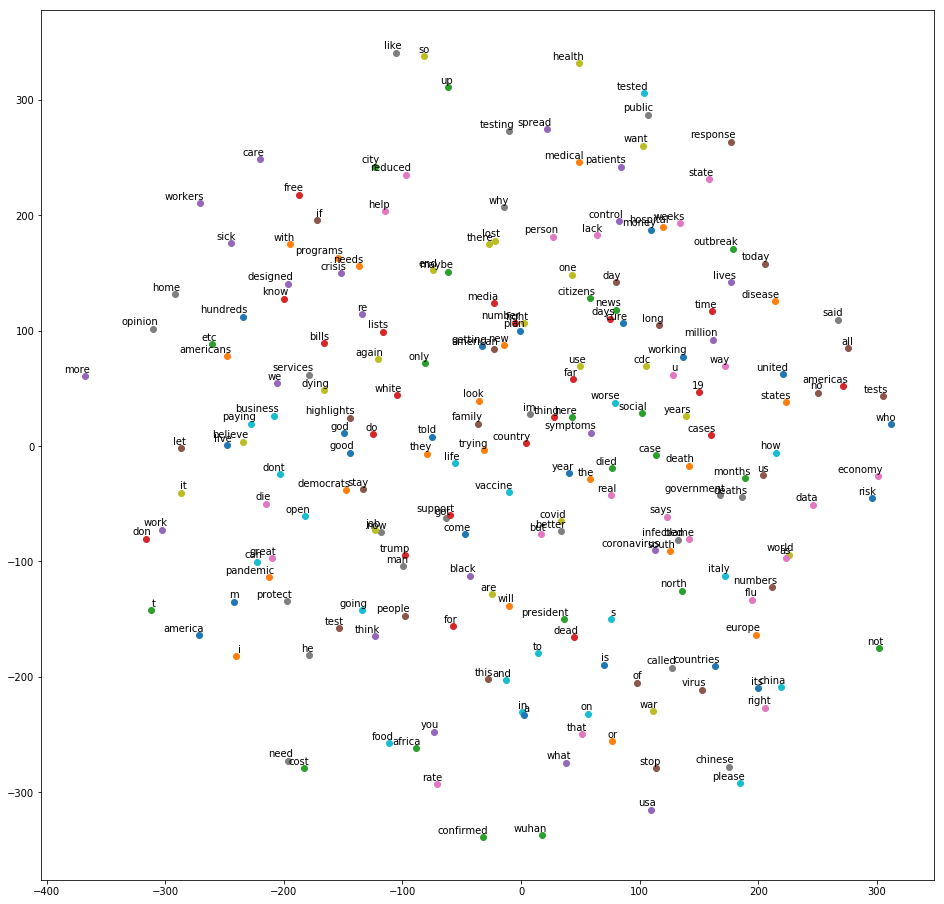

In [40]:
tsne_plot(Covidtweet_selective_model)

In [41]:
def display_closestwords_tsnescatterplot(model, word, size):
    
    arr = np.empty((0,size), dtype='f')
    word_labels = [word]
    close_words = model.similar_by_word(word)
    arr = np.append(arr, np.array([model[word]]), axis=0)
    for wrd_score in close_words:
        wrd_vector = model[wrd_score[0]]
        word_labels.append(wrd_score[0])
        arr = np.append(arr, np.array([wrd_vector]), axis=0)
        
    tsne = TSNE(n_components=3, random_state=0)
    np.set_printoptions(suppress=True)
    Y = tsne.fit_transform(arr)
    x_coords = Y[:, 0]
    y_coords = Y[:, 1]
    plt.scatter(x_coords, y_coords)
    for label, x, y in zip(word_labels, x_coords, y_coords):
        plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')
        plt.xlim(x_coords.min()+0.00005, x_coords.max()+0.00005)
        plt.ylim(y_coords.min()+0.00005, y_coords.max()+0.00005)
    plt.show()

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `similar_by_word` (Method will be removed in 4.0.0, use self.wv.similar_by_word() instead).
  """
/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  
/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


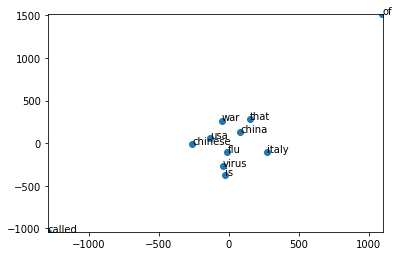

In [42]:
display_closestwords_tsnescatterplot(Covidtweet_selective_model,'virus',100)

### Latent Dirichlet Allocation

In [43]:
from gensim.models import LdaModel
from gensim.corpora.dictionary import Dictionary

common_dictionary = Dictionary(tok_corp)
common_corpus = [common_dictionary.doc2bow(text) for text in tok_corp]

lda = LdaModel(common_corpus, num_topics=20, alpha='auto', eval_every=5)

In [44]:
from gensim import corpora, models

list_of_list_of_tokens = list(tok_corp)
dictionary_LDA = corpora.Dictionary(list_of_list_of_tokens)
dictionary_LDA.filter_extremes(no_below=3)
corpus = [dictionary_LDA.doc2bow(list_of_tokens) for list_of_tokens in list_of_list_of_tokens]

num_topics = 20
%time lda_model = models.LdaModel(corpus, num_topics=num_topics, \
                                  id2word=dictionary_LDA, \
                                  passes=4, alpha=[0.01]*num_topics, \
                                  eta=[0.01]*len(dictionary_LDA.keys()))

CPU times: user 14.4 s, sys: 11.6 ms, total: 14.4 s
Wall time: 14.5 s


In [45]:
num_topics = 10
for i,topic in lda_model.show_topics(formatted=True, num_topics=num_topics, num_words=10):
    print(str(i)+": "+ topic)
    print()

14: 0.043*"cases" + 0.043*"deaths" + 0.025*"united" + 0.025*"states" + 0.024*"s" + 0.018*"number" + 0.014*"the" + 0.013*"confirmed" + 0.013*"work" + 0.012*"trump"

4: 0.033*"s" + 0.027*"china" + 0.025*"wuhan" + 0.022*"states" + 0.021*"united" + 0.018*"effort" + 0.017*"efforts" + 0.017*"originated" + 0.016*"combat" + 0.016*"viruses"

16: 0.023*"trump" + 0.021*"you" + 0.020*"people" + 0.019*"and" + 0.019*"or" + 0.018*"we" + 0.017*"it" + 0.017*"the" + 0.016*"s" + 0.011*"this"

3: 0.036*"death" + 0.018*"the" + 0.017*"toll" + 0.016*"coronavirus" + 0.015*"people" + 0.015*"died" + 0.015*"world" + 0.013*"shows" + 0.012*"italy" + 0.012*"dr"

5: 0.043*"s" + 0.027*"it" + 0.026*"people" + 0.020*"i" + 0.011*"she" + 0.011*"treatment" + 0.010*"getting" + 0.009*"americans" + 0.008*"died" + 0.008*"age"

11: 0.028*"europe" + 0.024*"states" + 0.024*"united" + 0.022*"china" + 0.020*"s" + 0.016*"it" + 0.013*"i" + 0.012*"country" + 0.010*"africa" + 0.010*"or"

9: 0.021*"states" + 0.017*"united" + 0.015*"tes

In [46]:
pip install pyLDAvis

Note: you may need to restart the kernel to use updated packages.


In [47]:
%matplotlib inline
import pyLDAvis
import pyLDAvis.gensim
vis = pyLDAvis.gensim.prepare(topic_model=lda_model, corpus=corpus, dictionary=dictionary_LDA)
pyLDAvis.enable_notebook()
pyLDAvis.display(vis)

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))
